In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

**Attribute Information**


Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

In [4]:
df.shape

(1599, 12)

In [5]:
##  Checking null values in the dataset

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Since there is no null values present in the data, we can proceed further.**

# EDA

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Observations**

1) All the columns has same count as 1599 which means there is no null values in the dataset.

2) Mean and std of all the columns looks feasible

**Lets see more analysis using graphical methods**


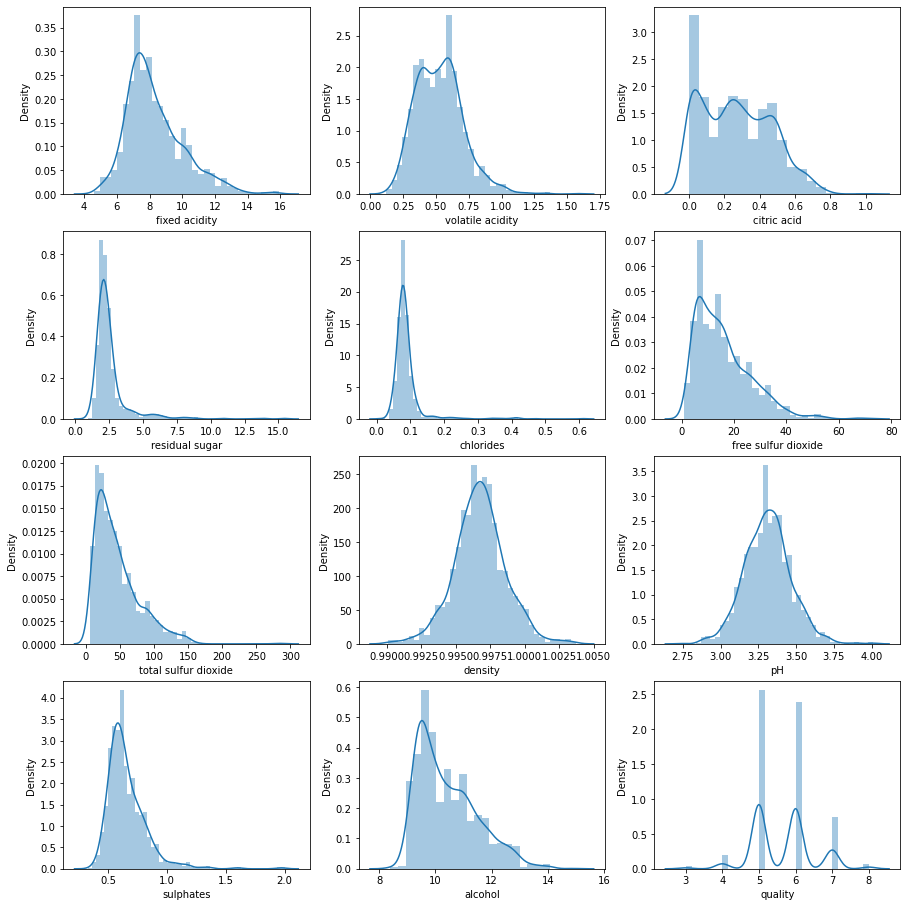

In [7]:
# Distribution plot
plt.figure(figsize = (15,20))
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize =10)
    plotnumber+=1
plt.show()

**We can observe from the distribution plot of the features that:**

a) Data distribution of 'fixedacidity' is more or less normally distributed with some skewness in the positive side.

b) 'Volatile acidity' data is normally distributed with some skewness in the positive side.

c) 'Citric acid' data looks close to normally distributed.

d) 'residual sugar' data is positively skewed.

e) 'chlorides' data is positively skewed.

f) 'free sulfur dioxide' data looks positively skewed as well.

g) 'total sulfur dioxide' data too is positively skewed.

h) 'density' data is normally distributed.

i) 'pH' is normally distributed.

j)'sulphates' looks positively skewed.

k) 'alcohol' data looks little bit positively skewed as well.

Lets check the skewnes present in the data

In [8]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

**Outcome of Skewness:**

Skewness threshold is taken as +/- 0.65. Columns having skewness:

* fixed acidity

* volatile acidity

* residual sugar

* chlorides

* free sulfur dioxide

* total sulfur dioxide

* sulphates

* alcohol

# Plotting Heatmap (Correlation Matrix)

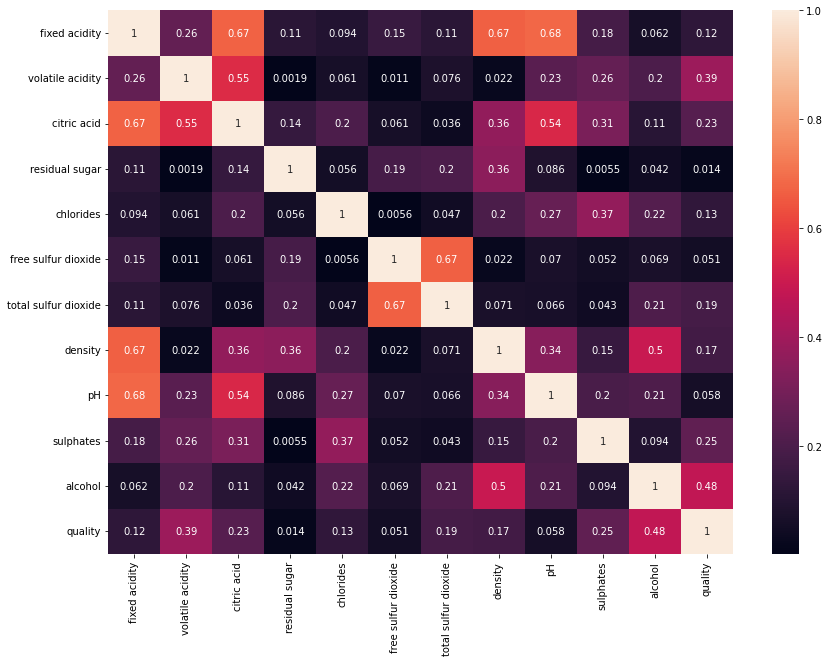

In [9]:
df_corr = df.corr().abs()

plt.figure(figsize = (14,10))

sns.heatmap(df_corr,annot = True,annot_kws = {'size':10})

plt.show()

**Correlation coefficient threshold is taken as +/- 0.75.All correlation coffecients are less than 0.75.Looks good to proceed further**

Now we will remove skewness using PowerTransformer

In [10]:
from sklearn.preprocessing import PowerTransformer

In [11]:
pt = PowerTransformer()

In [12]:
X = df.drop('quality',axis=1)
y = df['quality']

In [13]:
X_new_pt = pt.fit_transform(X)

In [14]:
# Converting numpy array(X_new_pt) into Dataframe and reassigning the values

X = pd.DataFrame(X_new_pt,columns= X.columns)

In [15]:
# Checking Skewness
X.skew().sort_values(ascending=False)

alcohol                 0.112372
citric acid             0.017788
sulphates               0.009985
volatile acidity        0.003099
fixed acidity           0.002529
pH                     -0.002823
total sulfur dioxide   -0.003752
density                -0.005054
free sulfur dioxide    -0.009948
residual sugar         -0.015715
chlorides              -0.151304
dtype: float64

In [16]:
df_new = X

In [17]:
df_new['quality'] = y

In [18]:
y.nunique()

6

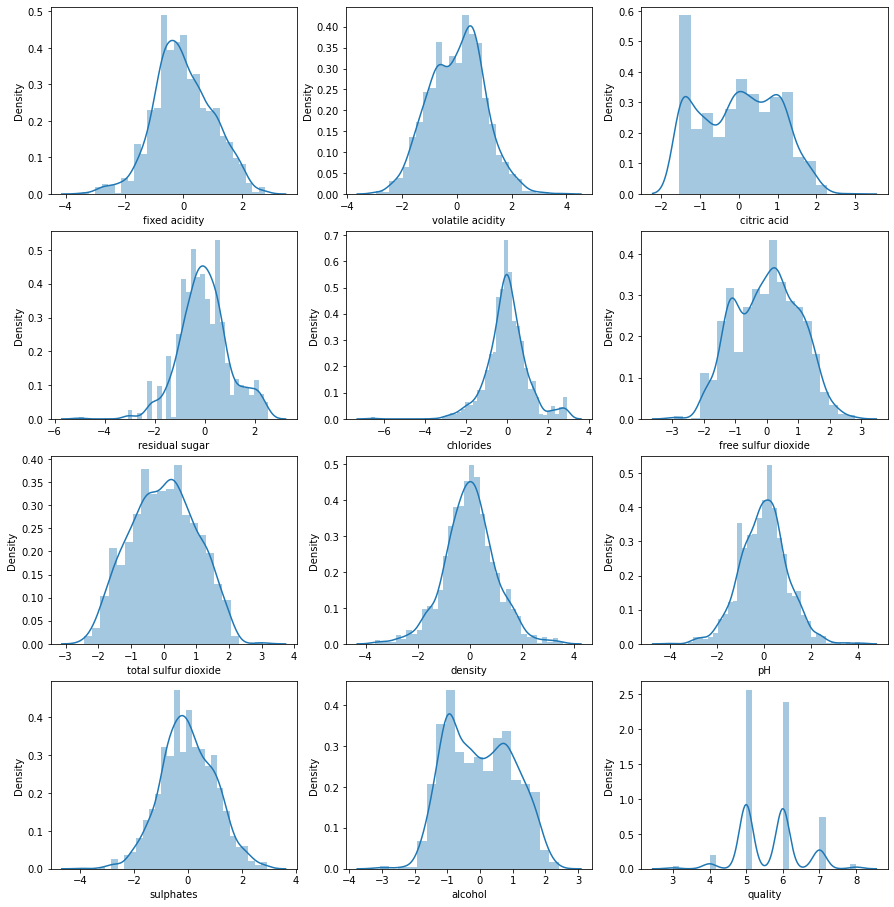

In [19]:
# Checking skewness using Distribution plot
plt.figure(figsize = (15,20))
plotnumber=1

for column in df_new:
    if plotnumber<=12:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize =10)
    plotnumber+=1
plt.show()

# Target Variable

In [20]:
df_new.quality

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [21]:
# setting an arbitrary cutoff for our dependent variable (wine quality) at  7 or higher getting classified as 'good/1' and the
# remainder as 'not good/0'.
# Quality ==> 0 : Not good and 1 : Good
df_new['quality']=df_new['quality'].replace({1:0,2:0,5:0,6:0,3:0,4:0,7:1,8:1,9:1,10:1})

In [22]:
df_new.quality.nunique()

2

In [23]:
Counter(df_new.quality)

Counter({0: 1382, 1: 217})

**The data is imbalanced and need to be balanced**

# Balancing target variable using SMOTE

In [24]:
from imblearn.over_sampling import SMOTE

**Seperating datasets into features and target variable and then into train and test data**

In [25]:
X = df_new.drop('quality',axis=1)
y = df_new['quality']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

In [26]:
y_test.nunique()

2

**Over_sampling of train data**

In [27]:
over_smp = SMOTE(0.8)
X_train_ns,y_train_ns = over_smp.fit_resample(X_train,y_train)

print("The number of train classes before fit {}".format(Counter(y_train)))

print("The number of train classes after fit{}".format(Counter(y_train_ns)))

The number of train classes before fit Counter({0: 1102, 1: 177})
The number of train classes after fitCounter({0: 1102, 1: 881})


**Over_sampling of test data**

In [28]:
X_test_ns,y_test_ns = over_smp.fit_resample(X_test,y_test)

print("The number of test classes before fit {}".format(Counter(y_test)))

print("The number of test classes after fit{}".format(Counter(y_test_ns)))

The number of test classes before fit Counter({0: 280, 1: 40})
The number of test classes after fitCounter({0: 280, 1: 224})


# Function for Model performance calculation

In [29]:
# Defining function for calculating the performance of the classification model
def metric_score(clf,X_train,X_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(X_train)
        
        print("-----------------Train Result--------------------")
        
        print(f"Accuracy Score : {accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train == False:
        
        pred = clf.predict(X_test)
        
        print("-----------------Test Result--------------------")
        
        print(f"Accuracy Score : {accuracy_score(y_test,pred)*100:.2f}%")
        
        print("\n Test Classification Report \n ", classification_report(y_test,pred,digits =2))

# Model initialisation - DecisionTree

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [31]:
# Model initiation

clf = DecisionTreeClassifier()

clf.fit(X_train_ns,y_train_ns)

DecisionTreeClassifier()

In [32]:
metric_score(clf,X_train_ns,X_test_ns,y_train_ns,y_test_ns,train = True)

metric_score(clf,X_train_ns,X_test_ns,y_train_ns,y_test_ns,train = False)

-----------------Train Result--------------------
Accuracy Score : 100.00%
-----------------Test Result--------------------
Accuracy Score : 80.95%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.79      0.90      0.84       280
           1       0.85      0.69      0.76       224

    accuracy                           0.81       504
   macro avg       0.82      0.80      0.80       504
weighted avg       0.82      0.81      0.81       504



# Hyperparameter Tuning - Decision Tree

In [33]:
grid_param = {'criterion': ['gini','entropy'],
             'max_depth': range(9,20),
              'min_samples_leaf': range(8,14),
              'min_samples_split': range(3,8),
              'max_leaf_nodes': range(30,50)
             }

In [34]:
grid_search = GridSearchCV(estimator = clf, param_grid = grid_param,cv = 5, n_jobs =-1)

In [35]:
grid_search.fit(X_train_ns,y_train_ns)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(9, 20),
                         'max_leaf_nodes': range(30, 50),
                         'min_samples_leaf': range(8, 14),
                         'min_samples_split': range(3, 8)})

In [36]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 12, 'max_leaf_nodes': 31, 'min_samples_leaf': 8, 'min_samples_split': 7}


In [37]:
clf = DecisionTreeClassifier(criterion ='gini', max_depth =12, min_samples_leaf = 8, min_samples_split = 7, max_leaf_nodes = 31)

clf.fit(X_train_ns,y_train_ns)

DecisionTreeClassifier(max_depth=12, max_leaf_nodes=31, min_samples_leaf=8,
                       min_samples_split=7)

In [38]:
metric_score(clf,X_train_ns,X_test_ns,y_train_ns,y_test_ns,train = True)

metric_score(clf,X_train_ns,X_test_ns,y_train_ns,y_test_ns,train = False)

-----------------Train Result--------------------
Accuracy Score : 90.62%
-----------------Test Result--------------------
Accuracy Score : 78.37%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.79      0.84      0.81       280
           1       0.78      0.71      0.75       224

    accuracy                           0.78       504
   macro avg       0.78      0.78      0.78       504
weighted avg       0.78      0.78      0.78       504



# Model initialisation - RandomForestClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
clf_rf = RandomForestClassifier()

clf_rf.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [41]:
metric_score(clf_rf,X_train_ns,X_test_ns,y_train_ns,y_test_ns,train = True)

metric_score(clf_rf,X_train_ns,X_test_ns,y_train_ns,y_test_ns,train = False)

-----------------Train Result--------------------
Accuracy Score : 100.00%
-----------------Test Result--------------------
Accuracy Score : 77.98%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.74      0.92      0.82       280
           1       0.86      0.60      0.71       224

    accuracy                           0.78       504
   macro avg       0.80      0.76      0.77       504
weighted avg       0.80      0.78      0.77       504



# Hyperparameter Tuning - RandomForestClassifier

In [42]:
params = {'n_estimators': [98,99,101,102],
          'criterion':['gini','entropy'],
         'max_depth': [10,12,13,25],
         'min_samples_split' :[2,3,4,5],
         'min_samples_leaf' :[1,2,3,4]}

In [43]:
grd = GridSearchCV(clf_rf,param_grid = params,cv = 5, n_jobs =-1)

grd.fit(X_train_ns,y_train_ns)

print("Best parameters : ",grd.best_params_)

Best parameters :  {'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 101}


In [44]:
clf_rf = grd.best_estimator_

clf_rf.fit(X_train_ns,y_train_ns)

RandomForestClassifier(criterion='entropy', max_depth=25, min_samples_split=4,
                       n_estimators=101)

In [45]:
metric_score(clf_rf,X_train_ns,X_test_ns,y_train_ns,y_test_ns,train = True)

metric_score(clf_rf,X_train_ns,X_test_ns,y_train_ns,y_test_ns,train = False)

-----------------Train Result--------------------
Accuracy Score : 100.00%
-----------------Test Result--------------------
Accuracy Score : 78.37%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.75      0.92      0.83       280
           1       0.86      0.62      0.72       224

    accuracy                           0.78       504
   macro avg       0.80      0.77      0.77       504
weighted avg       0.80      0.78      0.78       504



# Model initialisation - KNeighborsClassifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
clf_knn = KNeighborsClassifier()

clf_knn.fit(X_train_ns,y_train_ns)

KNeighborsClassifier()

In [48]:
metric_score(clf_knn,X_train_ns,X_test_ns,y_train_ns,y_test_ns,train = True)

metric_score(clf_knn,X_train_ns,X_test_ns,y_train_ns,y_test_ns,train = False)

-----------------Train Result--------------------
Accuracy Score : 92.03%
-----------------Test Result--------------------
Accuracy Score : 80.16%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.83      0.81      0.82       280
           1       0.77      0.79      0.78       224

    accuracy                           0.80       504
   macro avg       0.80      0.80      0.80       504
weighted avg       0.80      0.80      0.80       504



# Hyperparameter Tuning - KNeighborsClassifier

In [49]:
knn_params = { 'n_neighbors':[4,5,6,7],
        'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'leaf_size':[25,30,35]}

In [50]:
grd_knn = GridSearchCV(clf_knn,param_grid = knn_params,cv = 5, n_jobs =-1)

grd_knn.fit(X_train_ns,y_train_ns)

print("Best parameters : ",grd_knn.best_params_)

Best parameters :  {'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 4, 'weights': 'distance'}


In [51]:
clf_knn = grd_knn.best_estimator_

clf_knn.fit(X_train_ns,y_train_ns)

KNeighborsClassifier(leaf_size=25, n_neighbors=4, weights='distance')

In [52]:
metric_score(clf_knn,X_train_ns,X_test_ns,y_train_ns,y_test_ns,train = True)

metric_score(clf_knn,X_train_ns,X_test_ns,y_train_ns,y_test_ns,train = False)

-----------------Train Result--------------------
Accuracy Score : 100.00%
-----------------Test Result--------------------
Accuracy Score : 80.75%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.80      0.87      0.83       280
           1       0.82      0.73      0.77       224

    accuracy                           0.81       504
   macro avg       0.81      0.80      0.80       504
weighted avg       0.81      0.81      0.81       504



# Model initialisation - SVMClassifier

In [53]:
from sklearn.svm import SVC

In [54]:
clf_svc = SVC()

clf_svc.fit(X_train_ns,y_train_ns)

SVC()

In [55]:
metric_score(clf_svc,X_train_ns,X_test_ns,y_train_ns,y_test_ns,train = True)

metric_score(clf_svc,X_train_ns,X_test_ns,y_train_ns,y_test_ns,train = False)

-----------------Train Result--------------------
Accuracy Score : 90.82%
-----------------Test Result--------------------
Accuracy Score : 79.76%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.78      0.88      0.83       280
           1       0.82      0.69      0.75       224

    accuracy                           0.80       504
   macro avg       0.80      0.79      0.79       504
weighted avg       0.80      0.80      0.79       504



# Hyperparameter Tuning - SVC

In [56]:
svc_params = {'kernel':['rbf','linear','poly','sigmoid'],
              'gamma':['scale','auto'],
              'decision_function_shape':['ovr','ovo'],
              'random_state':range(20,100)}

In [57]:
grd_svc = GridSearchCV(clf_svc,param_grid = svc_params,cv = 5, n_jobs =-1)

grd_svc.fit(X_train_ns,y_train_ns)

print("Best parameters : ",grd_svc.best_params_)

Best parameters :  {'decision_function_shape': 'ovr', 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 20}


In [58]:
clf_svc = grd_svc.best_estimator_

clf_svc.fit(X_train_ns,y_train_ns)

SVC(gamma='auto', random_state=20)

In [59]:
metric_score(clf_svc,X_train_ns,X_test_ns,y_train_ns,y_test_ns,train = True)

metric_score(clf_svc,X_train_ns,X_test_ns,y_train_ns,y_test_ns,train = False)

-----------------Train Result--------------------
Accuracy Score : 90.82%
-----------------Test Result--------------------
Accuracy Score : 79.56%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.78      0.88      0.83       280
           1       0.82      0.69      0.75       224

    accuracy                           0.80       504
   macro avg       0.80      0.78      0.79       504
weighted avg       0.80      0.80      0.79       504



# Model initialisation - LogisticRegression

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
clf_lr = LogisticRegression()

clf_lr.fit(X_train_ns,y_train_ns)

LogisticRegression()

In [62]:
metric_score(clf_lr,X_train_ns,X_test_ns,y_train_ns,y_test_ns,train = True)

metric_score(clf_lr,X_train_ns,X_test_ns,y_train_ns,y_test_ns,train = False)

-----------------Train Result--------------------
Accuracy Score : 82.20%
-----------------Test Result--------------------
Accuracy Score : 81.75%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.85      0.81      0.83       280
           1       0.78      0.83      0.80       224

    accuracy                           0.82       504
   macro avg       0.82      0.82      0.82       504
weighted avg       0.82      0.82      0.82       504



# Hyprparameter Tuning - Logistic Regression

In [63]:
lr_params = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
             'tol':[0.0001,0.001,0.01],
             'random_state':range(1,100),
             'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'multi_class':['auto', 'ovr', 'multinomial']}

In [64]:
grd_lr = GridSearchCV(clf_lr,param_grid = lr_params,cv = 5, n_jobs =-1)

grd_lr.fit(X_train_ns,y_train_ns)

print("Best parameters : ",grd_lr.best_params_)

Best parameters :  {'multi_class': 'auto', 'penalty': 'l2', 'random_state': 53, 'solver': 'sag', 'tol': 0.01}


In [65]:
clf_lr = LogisticRegression(multi_class='auto',penalty= 'none', random_state= 44, solver= 'sag', tol= 0.01)

clf_lr.fit(X_train_ns,y_train_ns)

LogisticRegression(penalty='none', random_state=44, solver='sag', tol=0.01)

In [66]:
metric_score(clf_lr,X_train_ns,X_test_ns,y_train_ns,y_test_ns,train = True)

metric_score(clf_lr,X_train_ns,X_test_ns,y_train_ns,y_test_ns,train = False)

-----------------Train Result--------------------
Accuracy Score : 82.40%
-----------------Test Result--------------------
Accuracy Score : 81.55%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.85      0.81      0.83       280
           1       0.78      0.82      0.80       224

    accuracy                           0.82       504
   macro avg       0.81      0.82      0.81       504
weighted avg       0.82      0.82      0.82       504



# Plotting ROC AUC curve to choose best model

In [67]:
from sklearn.metrics import plot_roc_curve

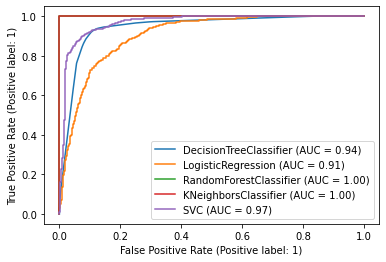

In [68]:
# Plotting ROC AUC curve on training data

disp = plot_roc_curve(clf,X_train_ns,y_train_ns)

plot_roc_curve(clf_lr,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(clf_rf,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(clf_knn,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(clf_svc,X_train_ns,y_train_ns,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

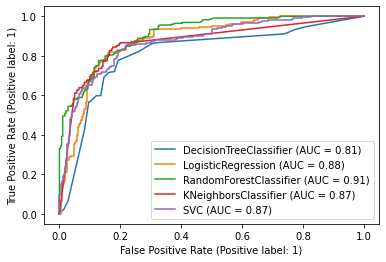

In [69]:
# Plotting ROC AUC curve on test data

disp = plot_roc_curve(clf,X_test_ns,y_test_ns)

plot_roc_curve(clf_lr,X_test_ns,y_test_ns,ax=disp.ax_)

plot_roc_curve(clf_rf,X_test_ns,y_test_ns,ax=disp.ax_)

plot_roc_curve(clf_knn,X_test_ns,y_test_ns,ax=disp.ax_)

plot_roc_curve(clf_svc,X_test_ns,y_test_ns,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

**Best Model for the given dataset as per ROC AUC Curve:**

**1. Logistic Regression**

* 2. Random Forest Classifier

* 3. SVC

* 4. K Neighbor Classifier

* 5. Decision Tree Classifier



# Saving the model in the pickle format

In [70]:
import pickle

In [71]:
filename = 'red_wine.pkl'
pickle.dump(clf_lr,open(filename,'wb'))

# Conclusion

In [73]:
loaded_model = pickle.load(open('red_wine.pkl','rb'))

lr_pred = loaded_model.predict(X_test_ns)

result = accuracy_score(y_test_ns,lr_pred)

print(result*100)

81.54761904761905


In [75]:
conclusion = pd.DataFrame([lr_pred,y_test_ns],index=['Predicted','Original'])

In [76]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,494,495,496,497,498,499,500,501,502,503
Predicted,0,1,1,1,0,0,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
Original,0,1,0,1,0,0,0,1,0,0,...,1,1,1,1,1,1,1,1,1,1
